<a href="https://colab.research.google.com/github/carmeniturbe/ejercicios_adv_machine_learning/blob/main/05_Ejercicio_simple_sobre_la_red_neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio simple sobre la red neuronal (base)
En esta asignación crearás una red simple utilizando capas densas.  También crearás 2 más versiones de eso cuando ajustes el número de capas y neuronas por capa para ver si puede lograr un mejor rendimiento.

Tarea: Crear un modelo de aprendizaje profundo para predecir la enfermedad cardíaca en poblaciones de riesgo.  

Fuente de datos: conjunto de datos de la enfermedad cardíaca de Kaggle

Enlace directo a los datos: heart.csv

TAREA: Utilizar una red neuronal para predecir la enfermedad cardíaca usando los datos determinados.

Asegúrate de:

- Explorar y limpiar los datos si es necesario
- Realizar una división train-test en tus datos
- Utilizar un transformador de columna para escalar las características numéricas y realizar una codificación one-hot a las características categóricas.
- Definir tu modelo secuencial de base
- Incluir el número de características para cada muestra en tu capa de entrada
- Utilizar la función de activación correcta y el número correcto de neuronas para tu capa de salida
Compilar tu modelo con la función de pérdida correcta y un optimizador (“adam” es una buena opción)
- Trazar el historial de entrenamiento de tu modelo
- Evaluar tu modelo con las métricas adecuadas.

Después que lo hayas creado, y evaluado tu primer modelo, intenta 2 versiones más de él con diferentes números de capas y neuronas para ver si puedes crear un modelo que obtenga mejores resultados en los datos de prueba.

Diccionario de datos:

Age: edad del paciente [años]

Sex: sexo del paciente [M: masculino, F: femenino]

ChestPainType: tipo de dolor de pecho [TA: angina típica, ATA: angina atípica, NAP: dolor no anginoso, ASY: asintomático]

RestingBP: presión sanguínea en estado de reposo [mm Hg]

Colesterol: colesterol sérico [mm/dl]

FastingBS: azúcar en sangre en ayunas [1: si FastingBS > 120 mg/dl, 0: en caso contrario]

RestingECG: resultados de electrocardiograma en reposo [Normal: normal, ST: tener una anormalidad en la onda ST-T (inversiones de onda T y/o elevación o depresión de ST de > 0.05 mV), LVH: muestra hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes].

MaxHR: máximo ritmo cardíaco alcanzado [valor numérico entre 60 y 202]

ExerciseAngina: angina inducida por el ejercicio [Y: sí, N: no]

Oldpeak: oldpeak = ST [valor numérico medido en depresión]

ST_Slope: la pendiente del ejercicio máximo en el segmento ST [Up: pendiente ascendente, Flat: plano, Down: pendiente descendente]

HeartDisease: enfermedad cardíaca, clase de salida [1: enfermedad cardíaca, 0: normal]

Sube tu cuaderno abajo



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential, load_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn import set_config
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import preprocessing
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [5]:
# Get data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science - Coding Dojo/Data/heart - heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [9]:
df.duplicated().sum()

0

In [10]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [11]:
df["Sex"].value_counts() # We'll convert this column with One hot encoder because there will only be two additional columns

M    725
F    193
Name: Sex, dtype: int64

In [12]:
df["ChestPainType"].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [15]:
# We'll use label encoder to convert the ChestPainType category from object to int
label_encoder = preprocessing.LabelEncoder()
df['ChestPainType'] = label_encoder.fit_transform(df['ChestPainType'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 86.2+ KB


In [16]:
df["RestingECG"].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [17]:
# We'll use label encoder to convert the RestingECG category from object to int
label_encoder = preprocessing.LabelEncoder()
df['RestingECG'] = label_encoder.fit_transform(df['RestingECG'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 86.2+ KB


In [18]:
df["ExerciseAngina"].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [19]:
# We'll replace the values to convert this column to numerical
df['ExerciseAngina'] = df['ExerciseAngina'].replace({'Y': 1, 'N': 0})
df['ExerciseAngina'].value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 86.2+ KB


In [20]:
df["ST_Slope"].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [21]:
# We'll use label encoder to convert the ST_Slope category from object to int
label_encoder = preprocessing.LabelEncoder()
df['ST_Slope'] = label_encoder.fit_transform(df['ST_Slope'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 86.2+ KB


In [23]:
# Save X data
X = df.drop(columns = 'HeartDisease')
# Encode our target
y = df['HeartDisease']

In [24]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [25]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')  # This won't be needed for this df
mean_imputer = SimpleImputer(strategy='mean')  # This won't be needed for this df

# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')  # This won't be needed for this df

# Scaler
scaler = StandardScaler() # for numeric data
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False) # to turn categorical variables into a numerical representation

# Numeric pipeline
numeric_pipe = make_pipeline(freq_imputer, scaler)
numeric_pipe

# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

# Tuples para Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple, remainder= 'passthrough')
preprocessor

# fit on train
preprocessor.fit(X_train)

# transform train and test
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [27]:
# Check all the data is imputed and scaled
print(np.isnan(X_train).sum().sum(), 'missing values in training data')
print(np.isnan(X_test).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train are', X_train.dtype)
print('All data in X_test are', X_test.dtype)
print('\n')
print('shape of data is', X_train.shape)
print('\n')
X_train

0 missing values in training data
0 missing values in testing data


All data in X_train are float64
All data in X_test are float64


shape of data is (688, 12)




array([[-0.59268506, -0.81795419,  0.97144264, ..., -0.59518418,
         1.        ,  0.        ],
       [-0.0597952 ,  1.24719254,  1.53421843, ..., -0.59518418,
         0.        ,  1.        ],
       [-1.44530884, -0.81795419, -1.27966054, ..., -0.59518418,
         0.        ,  1.        ],
       ...,
       [-0.48610709, -0.81795419, -0.15410895, ..., -0.59518418,
         0.        ,  1.        ],
       [ 1.21914047, -0.81795419,  0.97144264, ..., -0.59518418,
         1.        ,  0.        ],
       [-1.12557492, -0.81795419,  0.97144264, ...,  1.06265677,
         0.        ,  1.        ]])

In [28]:
# Convert to DF for better visualization
X_train = pd.DataFrame(X_train)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.592685,-0.817954,0.971443,0.282463,-0.559444,-0.011623,-0.277856,1.221783,0.113427,-0.595184,1.0,0.0
1,-0.059795,1.247193,1.534218,-1.781543,1.787490,-1.610988,-0.585751,1.221783,-0.834785,-0.595184,0.0,1.0
2,-1.445309,-0.817954,-1.279661,-0.263089,-0.559444,-1.610988,-0.893647,1.221783,1.061639,-0.595184,0.0,1.0
3,0.259939,1.247193,-0.154109,-0.263089,-0.559444,-0.011623,-0.893647,-0.818476,-0.834785,1.062657,0.0,1.0
4,1.112562,-0.817954,-0.154109,0.973496,-0.559444,-0.011623,-0.585751,-0.818476,1.061639,-0.595184,1.0,0.0


#MODEL 1

##Step 1: Define our network structure

In [29]:

# Save the number of features we have as our input shape
input_shape = X_train.shape[1]
input_shape

12

In [30]:
# Sequential model
model = Sequential()

In [31]:
# First hidden layer
model.add(Dense(12, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?

# Second hidden layer
model.add(Dense(6, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?

# third hidden layer
model.add(Dense(3, activation = 'relu')) # What activation function are you using?

In [32]:
# Output layer
model.add(Dense(1, activation = 'sigmoid'))

## Step 2: Compile

We'll use the loss function called Binary crossentropy or bce


In [33]:
# loss = Binary crossentropy
model.compile(loss = 'bce', optimizer = 'adam')

## Step 3: Fit our model



In [34]:
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs=10)

Epoch 1/10
22/22 [==============================] - 2s 14ms/step - loss: 0.6342 - val_loss: 0.6153
Epoch 2/10
22/22 [==============================] - 0s 4ms/step - loss: 0.5896 - val_loss: 0.5651
Epoch 3/10
22/22 [==============================] - 0s 4ms/step - loss: 0.5440 - val_loss: 0.5139
Epoch 4/10
22/22 [==============================] - 0s 4ms/step - loss: 0.4990 - val_loss: 0.4593
Epoch 5/10
22/22 [==============================] - 0s 3ms/step - loss: 0.4572 - val_loss: 0.4089
Epoch 6/10
22/22 [==============================] - 0s 4ms/step - loss: 0.4226 - val_loss: 0.3700
Epoch 7/10
22/22 [==============================] - 0s 5ms/step - loss: 0.3984 - val_loss: 0.3456
Epoch 8/10
22/22 [==============================] - 0s 4ms/step - loss: 0.3828 - val_loss: 0.3295
Epoch 9/10
22/22 [==============================] - 0s 4ms/step - loss: 0.3706 - val_loss: 0.3193
Epoch 10/10
22/22 [==============================] - 0s 5ms/step - loss: 0.3628 - val_loss: 0.3111


## Visualize the loss

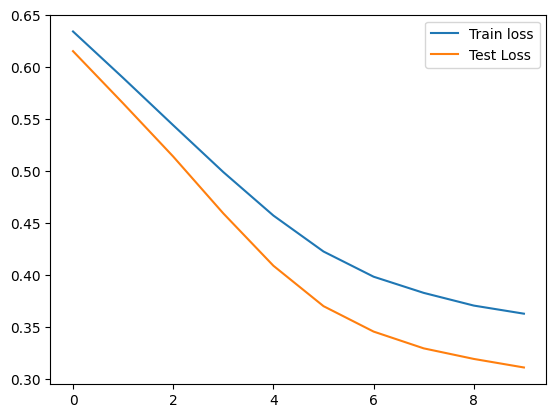

In [35]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

The loss exhibited a notable reduction with an increase in the number of epochs.

# MODEL 2

##Step 1: Define our network structure

In [37]:
# Sequential model
model_2 = Sequential()

In [40]:
# First hidden layer
model_2.add(Dense(12, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?

# Second hidden layer
model_2.add(Dense(10, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?



In [41]:
# Output layer
model_2.add(Dense(1, activation = 'sigmoid'))

##Step 2: Compile

In [42]:
# loss = Binary crossentropy
model_2.compile(loss = 'bce', optimizer = 'adam')

##Step 3: Fit our model

In [43]:
history2 = model_2.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs=10)

Epoch 1/10
22/22 [==============================] - 3s 32ms/step - loss: 0.7124 - val_loss: 0.6395
Epoch 2/10
22/22 [==============================] - 0s 6ms/step - loss: 0.6205 - val_loss: 0.5543
Epoch 3/10
22/22 [==============================] - 0s 5ms/step - loss: 0.5595 - val_loss: 0.4917
Epoch 4/10
22/22 [==============================] - 0s 6ms/step - loss: 0.5165 - val_loss: 0.4417
Epoch 5/10
22/22 [==============================] - 0s 5ms/step - loss: 0.4832 - val_loss: 0.4056
Epoch 6/10
22/22 [==============================] - 0s 5ms/step - loss: 0.4588 - val_loss: 0.3811
Epoch 7/10
22/22 [==============================] - 0s 5ms/step - loss: 0.4386 - val_loss: 0.3627
Epoch 8/10
22/22 [==============================] - 0s 6ms/step - loss: 0.4241 - val_loss: 0.3458
Epoch 9/10
22/22 [==============================] - 0s 6ms/step - loss: 0.4104 - val_loss: 0.3329
Epoch 10/10
22/22 [==============================] - 0s 6ms/step - loss: 0.3986 - val_loss: 0.3243


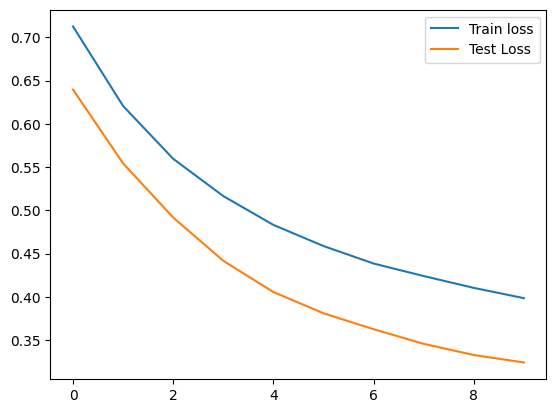

In [44]:
# Visualize the loss
plt.plot(history2.history['loss'], label='Train loss')
plt.plot(history2.history['val_loss'], label='Test Loss')
plt.legend();